In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.utils import pad_sequences
from gensim.models import Word2Vec

2025-06-10 18:00:48.080086: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 18:00:45.633860: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 18:00:45.896578: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 18:00:46.556083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-10 18:00:46.988761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
path= "../raw_data/train_df_ml_clean.csv"

In [3]:
clean_df = pd.read_csv(path)

In [4]:
clean_df = clean_df.sample(frac=0.1)
len(clean_df)

360000

In [5]:
clean_df.head()

,label,text,clean_text
139996,0,not satisfied: one of the c/d players is not w...,not satisfied one of the cd player is not work...
2737485,1,RIP Patrick: Patrick Swayze is and will always...,rip patrick patrick swayze is and will always ...
938827,1,"A great album from a great group: Aight, I jus...",a great album from a great group aight i just ...
807865,1,Good quality: It is hand made in Italy . Just ...,good quality it is hand made in italy just the...
2102633,0,Better Listen Carefully The First Time....: .....,better listen carefully the first time because...


In [6]:
X = clean_df['clean_text'].to_numpy()
y = clean_df['label'].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
X_val[:10]

array(['wonderfully done haddons the curious incident of the dog in the nighttime is an amazing book the diary quality of writing wa refreshing and easy to read but definitely not poorly writteni wa able to relate to christopher a my brother ha a mild case of autism and reading through a different thought pattern wa very interesting haddon pulled off the boy very well christopher did not seem fake or contrived in any way haddon created a very real and thoughtful character that everyone can relate toi would strongly recommend this book to anyone seeing the world through the eye of someone different is something that everyone should try',
       'pure entertainment v educational my kid age month and year old both adore this movie it span that difficult to entertain age range granted it not educational a much a it entertaining be i have to admit ive never seen it i pop it into the dvd player in the car they watch and i drive listening to the dvd audio through the car sound system i have t

In [8]:
import matplotlib.pyplot as plt

In [9]:
length_array = [len(seq) for seq in X_train.astype(str)]
length_array

[121,
 567,
 840,
 363,
 132,
 146,
 502,
 515,
 963,
 133,
 180,
 527,
 254,
 289,
 214,
 419,
 381,
 702,
 749,
 697,
 116,
 277,
 630,
 733,
 613,
 197,
 187,
 779,
 923,
 718,
 691,
 741,
 275,
 370,
 933,
 308,
 208,
 359,
 297,
 131,
 287,
 442,
 120,
 138,
 266,
 313,
 224,
 385,
 271,
 436,
 198,
 259,
 588,
 506,
 451,
 325,
 939,
 434,
 553,
 921,
 272,
 147,
 448,
 241,
 934,
 115,
 595,
 134,
 884,
 597,
 102,
 335,
 345,
 119,
 128,
 252,
 212,
 329,
 114,
 378,
 252,
 282,
 143,
 269,
 759,
 310,
 388,
 846,
 316,
 221,
 816,
 251,
 123,
 386,
 782,
 371,
 356,
 179,
 493,
 224,
 399,
 562,
 556,
 391,
 348,
 117,
 360,
 316,
 300,
 394,
 384,
 257,
 99,
 216,
 141,
 521,
 398,
 480,
 341,
 340,
 353,
 887,
 245,
 123,
 191,
 195,
 451,
 914,
 409,
 307,
 321,
 422,
 434,
 163,
 570,
 512,
 366,
 173,
 233,
 641,
 424,
 272,
 531,
 255,
 269,
 96,
 326,
 682,
 344,
 265,
 216,
 260,
 258,
 633,
 815,
 500,
 532,
 124,
 931,
 518,
 363,
 790,
 264,
 190,
 360,
 265,
 863,


(array([ 8366., 60345., 51357., 42910., 35332., 28464., 22013., 17320.,
        13981.,  7912.]),
 array([ 17. , 114.7, 212.4, 310.1, 407.8, 505.5, 603.2, 700.9, 798.6,
        896.3, 994. ]),
 <BarContainer object of 10 artists>)

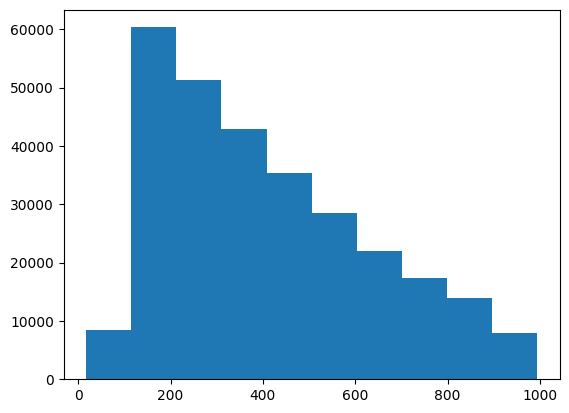

In [10]:
plt.hist(length_array)

In [11]:
X_train_token = [text_to_word_sequence(_) for _ in X_train.astype(str)]
X_val_token = [text_to_word_sequence(_) for _ in X_val.astype(str)]

In [12]:
# Learn embedding representation of words in reviews
word2vec = Word2Vec(sentences=X_train_token)
# Store words and trained embeddings in wv
wv = word2vec.wv

In [18]:
wv.most_similar("not", topn=10)

[('hardly', 0.5085338950157166),
 ('barely', 0.4799279272556305),
 ('neither', 0.46575334668159485),
 ('never', 0.4493506848812103),
 ('noti', 0.4173307418823242),
 ('isnt', 0.4085421860218048),
 ('trick', 0.40665605664253235),
 ('wasnt', 0.3955253064632416),
 ('pretty', 0.3903430104255676),
 ('nothing', 0.3837091624736786)]

In [19]:
len(wv.key_to_index.keys())

52267

# Optimized Embedding Function v1

In [20]:
from joblib import Parallel, delayed
import numpy as np
import os

In [21]:
def process_sentence_batch(wv_vectors, wv_vocab, vector_size, sentences_batch):
    """
    Process a batch of sentences efficiently.

    Args:
        wv_vectors: Word2Vec vectors array
        wv_vocab: Set of vocabulary words (for O(1) lookup)
        vector_size: Dimension of word vectors
        sentences_batch: List of sentences to process

    Returns:
        List of numpy arrays (embeddings for each sentence)
    """
    batch_embeddings = []

    for sentence in sentences_batch:
        # Filter valid words using set lookup (O(1))
        valid_words = [word for word in sentence if word in wv_vocab]

        if valid_words:
            # Get embeddings for valid words
            embeddings = np.array([wv_vectors[word] for word in valid_words])
        else:
            # Empty sentence or no valid words
            embeddings = np.array([]).reshape(0, vector_size)

        batch_embeddings.append(embeddings)

    return batch_embeddings

In [22]:
def embedding_optimized(wv, sentences, batch_size=10, n_jobs=-1):
    """
    Optimized embedding function using joblib parallelization.

    Args:
        wv: Word2Vec vectors object
        sentences: List of tokenized sentences
        batch_size: Number of sentences per batch
        n_jobs: Number of parallel jobs (-1 for all cores)

    Returns:
        List of numpy arrays (embeddings for each sentence)
    """
    print(f"Processing {len(sentences)} sentences...")

    # Pre-compute vocabulary set for O(1) lookups
    vocab = set(wv.key_to_index.keys())
    vector_size = wv.vector_size

    # Split sentences into batches
    batches = [sentences[i:i + batch_size]
               for i in range(0, len(sentences), batch_size)]

    print(f"Created {len(batches)} batches of ~{batch_size} sentences each")
    print(f"Using {n_jobs} parallel processes...")

    # Process batches in parallel
    results = Parallel(n_jobs=n_jobs, verbose=1, backend='loky')(
        delayed(process_sentence_batch)(wv, vocab, vector_size, batch)
        for batch in batches
    )

    # Flatten results
    all_embeddings = []
    for batch_result in results:
        all_embeddings.extend(batch_result)

    print(f"Successfully processed {len(all_embeddings)} sentences")
    return all_embeddings

In [23]:
X_train_embedded = embedding_optimized(wv, X_train_token, batch_size=10, n_jobs=-1)

Processing 288000 sentences...
Created 28800 batches of ~10 sentences each
Using -1 parallel processes...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 2008 tasks      | elapsed:   49.8s


: 

# Not-Optimized Embedding Function

In [15]:
import numpy as np

In [16]:
def embed_sentence(word2vec, sentence):
    wv = word2vec.wv
    res_matrix = []

    for word in sentence:

        if word in wv:
            res_matrix.append(wv[word])
        else:
            continue

    return np.array(res_matrix)

In [17]:
len(X_train_token[0])

106

In [18]:
#Checks
embedded_sentence = embed_sentence(word2vec, X_train_token[0])

In [19]:
type(embedded_sentence)

numpy.ndarray

In [20]:
assert(type(embedded_sentence) == np.ndarray)
#assert(embedded_sentence.shape == (120, 100))

In [ ]:
def embedding(word2vec, sentences):

    sentences_matrix = []

    for sentence in sentences:
        sentences_matrix.append(embed_sentence(word2vec, sentence))

    return sentences_matrix

: 

In [ ]:
X_train_embedded = embedding(word2vec, X_train_token)

In [20]:
len(X_train_embedded[0])

97

In [21]:
len(X_train_token[0])

100

# Padding

from tensorflow.keras.utils import pad_sequences

In [ ]:
X_train_pad_s = pad_sequences(X_train_embedded, dtype="float32", padding='post', value=0, maxlen=50)

In [ ]:
X_val_pad_s = pad_sequences(X_val_embedded, dtype="float32", padding='post', value=0, maxlen=50)